<a href="https://colab.research.google.com/github/ananya7rai/ClickWise/blob/main/ClickWise.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# ClickWise - CTR Prediction Model  

1. Importing libraries

In [99]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

2. Loading the Dataset

In [100]:
data = pd.read_csv('/content/data.csv')

In [120]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10534 entries, 0 to 10533
Data columns (total 31 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   search_term                         10534 non-null  object 
 1   product_variant_id                  10534 non-null  object 
 2   city_id                             10534 non-null  object 
 3   query_type                          10534 non-null  object 
 4   is_clicked                          10534 non-null  float64
 5   total_clicks                        10534 non-null  int64  
 6   session_views                       10534 non-null  int64  
 7   query_products_clicks_last_30_days  10534 non-null  int64  
 8   CTR_last_30_days                    10534 non-null  float64
 9   CTR_last_7_days                     10534 non-null  float64
 10  CTR_product_30_days                 10534 non-null  float64
 11  query_product_plt_clicks_60_days    10534

In [119]:
data.describe()

,is_clicked,total_clicks,session_views,query_products_clicks_last_30_days,CTR_last_30_days,CTR_last_7_days,CTR_product_30_days,query_product_plt_clicks_60_days,query_product_plt_ctr_60_days,CTR_plt_30_days,...,latest_margin,savings,savings_with_pass,ad_revenue,total_unique_orders,product_atcs_30_days,product_atcs_plt_30_days,total_unique_orders_plt_30_days,product_ctr_city_30_days,query_product_similarity
count,10534.000000,10534.000000,10534.000000,10534.000000,10534.000000,10534.000000,10534.000000,10534.000000,10534.000000,10534.000000,...,10534.000000,10534.000000,10534.000000,10533.000000,10533.000000,10533.00000,1.053300e+04,10533.000000,10533.000000,10533.000000
mean,0.300076,36.823904,1201.566167,14.097019,0.009016,0.007942,0.013273,321.537118,0.011012,0.026092,...,57.945728,0.180578,3.970419,8.256569,576.757714,1309.13453,1.486308e+04,6298.041299,0.015947,0.310181
std,0.458312,334.916264,6119.222219,136.768554,0.044123,0.045126,0.023969,3720.173724,0.046688,0.047809,...,206.888270,0.171338,2.245421,15.931140,3614.122378,9484.55181,8.630206e+04,32221.281316,0.025016,0.173767
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000e+00,0.000000,0.000000,-0.080215
25%,0.000000,0.000000,4.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.001658,...,10.744864,0.047189,2.726109,0.000000,0.000000,0.00000,0.000000e+00,0.000000,0.002514,0.174172
50%,0.000000,0.000000,39.000000,0.000000,0.000000,0.000000,0.005435,0.000000,0.000000,0.009927,...,23.345500,0.137127,3.818310,0.000000,28.000000,75.00000,1.072000e+03,412.000000,0.008132,0.300021
75%,1.000000,1.000000,377.000000,0.000000,0.000000,0.000000,0.016124,8.000000,0.004081,0.029410,...,51.040682,0.269069,5.011298,13.406733,203.000000,456.00000,5.409000e+03,2455.000000,0.019154,0.433681
max,1.000000,10996.000000,240567.000000,5501.000000,1.000000,1.000000,0.494235,180885.000000,1.000000,0.551291,...,9727.054167,0.881588,20.281576,178.444006,148800.000000,528598.00000,3.230154e+06,961589.000000,0.494235,0.958929


3. EDA

In [103]:
#checking for missing values
missing_values = data.isnull().sum()
print(missing_values[missing_values > 0])

product_name                        227
brand_name                         1337
category_name                       227
subcategory_name                    227
ad_revenue                            1
total_unique_orders                   1
product_atcs_30_days                  1
product_atcs_plt_30_days              1
total_unique_orders_plt_30_days       1
product_ctr_city_30_days              1
query_product_similarity              1
dtype: int64


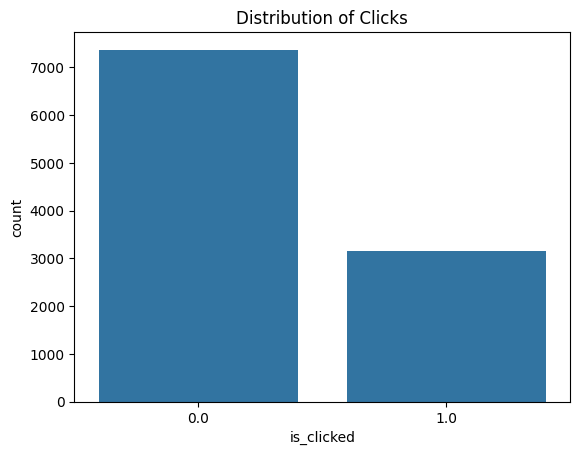

In [104]:
# Visualizing the distribution of the target variable 'is_clicked'
sns.countplot(x='is_clicked', data=data)
plt.title('Distribution of Clicks')
plt.show()

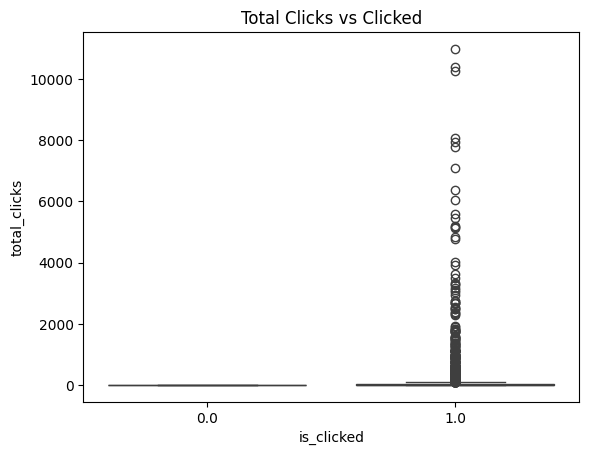

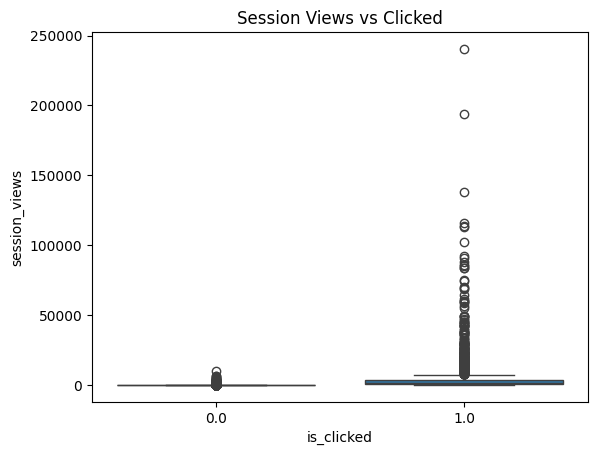

In [105]:
# Visualizing relationships between features(total_clicks and session_views) and the target variable
sns.boxplot(x='is_clicked', y='total_clicks', data=data)
plt.title('Total Clicks vs Clicked')
plt.show()
sns.boxplot(x='is_clicked', y='session_views', data=data)
plt.title('Session Views vs Clicked')
plt.show()

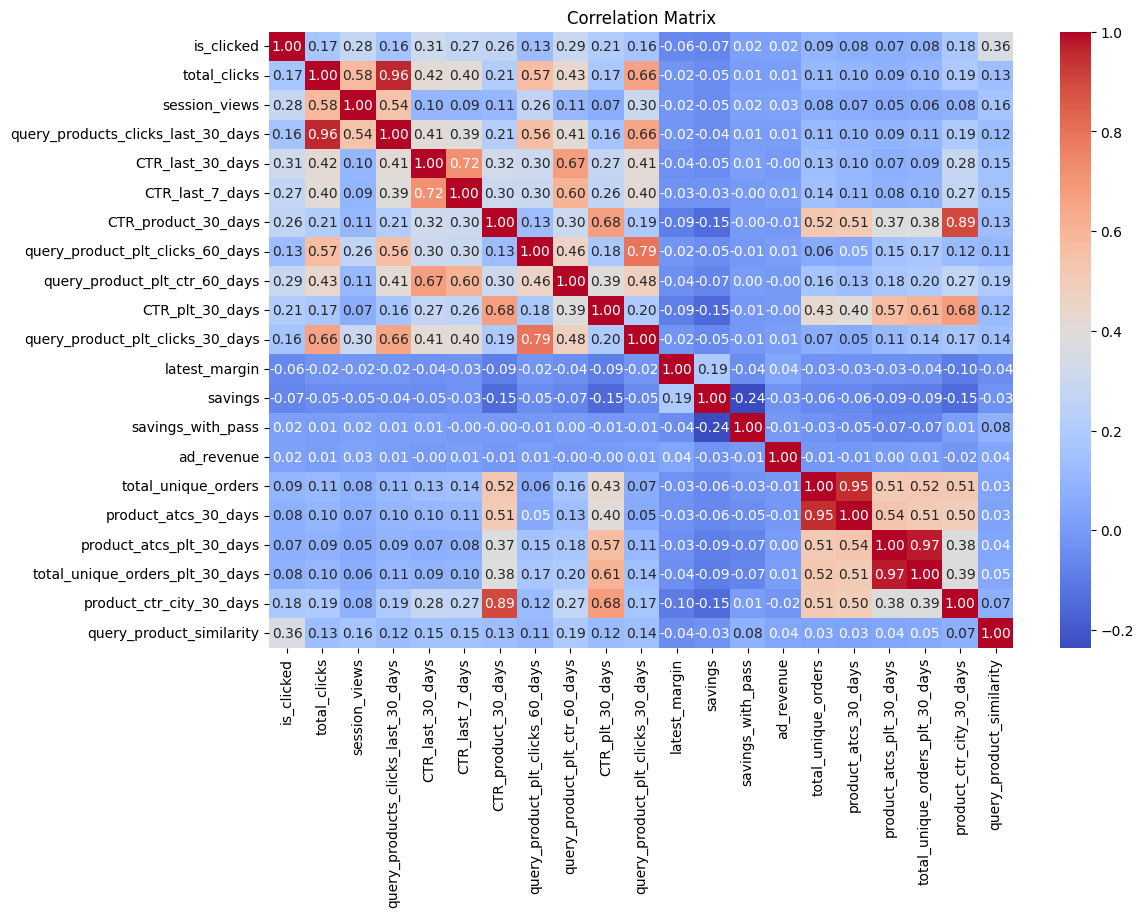

In [106]:
numerical_data = data.select_dtypes(include=[np.number])

corr_matrix = numerical_data.corr()
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, fmt='.2f', cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()


4. Feature Engineering

In [107]:
from sklearn.preprocessing import StandardScaler
#handling missing value(if any)
numerical_data.fillna(0, inplace=True)

In [108]:
# feature scaling
scaler = StandardScaler()
scaled_features = scaler.fit_transform(numerical_data.drop(columns=['is_clicked']))

In [109]:
# Getting the correct column names after dropping 'is_clicked'
scaled_columns = numerical_data.columns.drop('is_clicked')

# Creating DataFrame for scaled features using the correct column names
scaled_data = pd.DataFrame(scaled_features, columns=scaled_columns)

# Adding the target variable back to the scaled DataFrame
scaled_data['is_clicked'] = numerical_data['is_clicked']


In [110]:
# Feature selection using correlation threshold
correlation_threshold = 0.1
corr = scaled_data.corr()
important_features = corr.index[abs(corr['is_clicked']) > correlation_threshold].tolist()

final_data = scaled_data[important_features]

5. Model Building

In [111]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import roc_auc_score, accuracy_score, f1_score, roc_curve

In [112]:
#Splitting the dataset into training and testing sets
X = final_data.drop(columns=['is_clicked'])
y = final_data['is_clicked']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [113]:
models = {
    'Logistic Regression': LogisticRegression(),
    'Random Forest': RandomForestClassifier(),
    'Gradient Boosting': GradientBoostingClassifier()
}
log_reg = LogisticRegression()
rf_clf = RandomForestClassifier()
gb_clf = GradientBoostingClassifier()

Logistic Regression - AUC: 0.96, Accuracy: 0.92, F1 Score: 0.84
Random Forest - AUC: 1.00, Accuracy: 1.00, F1 Score: 1.00
Gradient Boosting - AUC: 1.00, Accuracy: 1.00, F1 Score: 1.00


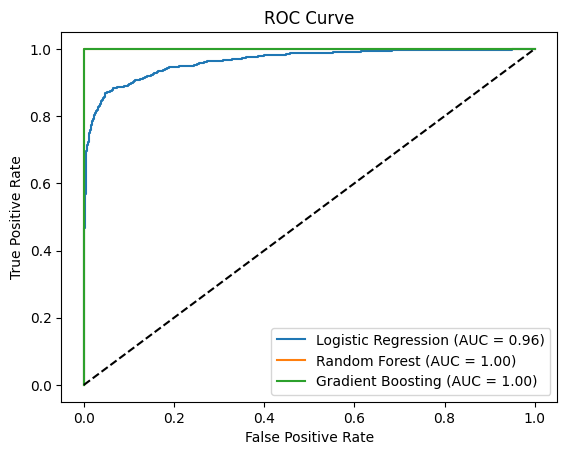

In [114]:
# Training and evaluating the models
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    y_proba = model.predict_proba(X_test)[:, 1]

    auc = roc_auc_score(y_test, y_proba)
    accuracy = accuracy_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)

    print(f"{name} - AUC: {auc:.2f}, Accuracy: {accuracy:.2f}, F1 Score: {f1:.2f}")

    # Plot ROC curve
    fpr, tpr, _ = roc_curve(y_test, y_proba)
    plt.plot(fpr, tpr, label=f'{name} (AUC = {auc:.2f})')

plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='best')
plt.show()


6. Model Evaluation and Selection

In [115]:
# Hyperparameter tuning for the best model
param_grid = {
    'n_estimators': [100, 200],
    'learning_rate': [0.01, 0.1],
    'max_depth': [3, 5]
}

In [116]:
grid_search = GridSearchCV(GradientBoostingClassifier(), param_grid, cv=5, scoring='roc_auc')
grid_search.fit(X_train, y_train)

best_model = grid_search.best_estimator_
y_pred_best = best_model.predict(X_test)
y_proba_best = best_model.predict_proba(X_test)[:, 1]

# Evaluating the best model
best_auc = roc_auc_score(y_test, y_proba_best)
best_accuracy = accuracy_score(y_test, y_pred_best)
best_f1 = f1_score(y_test, y_pred_best)

print(f"Best Model - AUC: {best_auc:.2f}, Accuracy: {best_accuracy:.2f}, F1 Score: {best_f1:.2f}")


Best Model - AUC: 1.00, Accuracy: 1.00, F1 Score: 1.00
